In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Pratibha\OneDrive\Desktop\DATA SCIENCE RESOURCES\revenue-forecasting-scenario-planning\revenue-forecasting-scenario-planning\data\processed\monthly_revenue_processed_ALL_YEARS_CORRECT.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date").set_index("Date")
df = df.asfreq("MS")


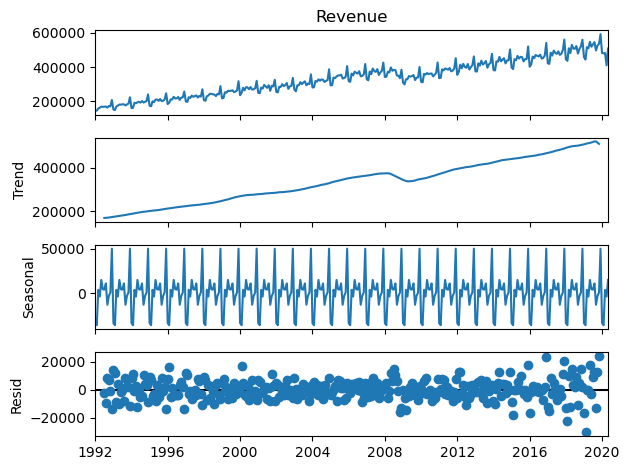

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(
    df["Revenue"],
    model="additive",
    period=12
)

decomp.plot();


### Trend Behaviour : 
The trend component confirms long-term revenue growth with clear macroeconomic shocks, validating the need for trend-aware forecasting rather than stationary models.
### Seasonality Pattern : 
Revenue exhibits stable annual seasonality, indicating predictable intra-year demand cycles that should be explicitly modeled.
### Residual spikes :
Extreme residuals correspond to real-world shocks rather than noise, supporting scenario-based stress testing rather than outlier removal.

In [4]:
decomp.resid.describe()


count      329.000000
mean       103.472470
std       7173.388574
min     -30345.746666
25%      -3834.323661
50%       -104.607887
75%       4562.828125
max      23997.453125
Name: resid, dtype: float64

### Decomposition Summary:
Time-series decomposition reveals a strong long-term upward trend and stable annual seasonality in revenue, with residual spikes aligning with major economic shocks such as the 2008 financial crisis and COVID-19. These findings justify the use of trend- and seasonality-aware forecasting models and motivate scenario-based analysis to handle extreme events rather than treating them as noise.